# Fiedler's Algorithm for Minimum Conductance via Cheeger's Inequality

Here, we will relate some of the powerful results about symmetric linear maps to mixing times, conductance, and sparsest cut. In particular, we will link the sparsity of a graph to its Laplacian, define the notion of conductance, and relate it to mixing times of random walks through a powerful result called the _Cheeger's Inequality_. The byproduct of this is a simple randomized algorithm for obtaining cuts with minimum conductance (__Fiedler's Algorithm__).

### Sparsity and the Laplacian

Recall the _sparsity_ of a cut $\delta(S)$ for $S \subset V$, denoted by $\Phi(S),$ is the ratio $$\frac{w(\delta(S))}{\min\{|S|, |\overline{S}|\}},$$

where $\overline{S} = V \setminus S.$ The sparsity of the graph $G$ was defined to be the sparsity of the sparsest cut ${\min}_{S \subset V} \Phi(S).$ Relating sparsity to the Laplacian, for a non-empty set $S \subset V$ with at most $n/2$ vertices, we have 

$$\Phi(S) = \frac{w(\delta(S))}{|{S}|} = \frac{\langle{\mathbb{1}_S, L\mathbb{1}_S}\rangle}{\langle{\mathbb{1}_S, \mathbb{1}_S}\rangle}.$$
    
Since $L$ is a positive semi-definite matrix, its eigenvalues are nonnegative with $\mathbb{1}$ as an eigenvector with eigenvalue of $0$—the smallest eigenvalue. Thus, the eigenvector corresponding to the second smallest eigenvalue, denoted by $\lambda_2$, is given by 
$$\lambda_2:= {\min}_{x:\langle{\mathbb{1}, x}\rangle = 0} \frac{\langle{x, Lx}\rangle}{\langle{x,x}\rangle}.$$

Now, for any cut $\mathbb{1}_S$ with $x$ being the orthogonal projection from $\mathbb{1};$ namely, 
$$x:= \mathbb{1}_S - \alpha\mathbb{1},$$ where 
$$\alpha = \frac{\langle{\mathbb{1}_S, \mathbb{1}}\rangle}{\langle{\mathbb{1}, \mathbb{1}}\rangle} = \frac{|{S}|}{n}.$$

Note that $\langle{x,x}\rangle = \langle{x,\mathbb{1}_S}\rangle = (1-\alpha)|{S}| = (n-|{S}|)|{S}|/n,$ which yields $$\lambda_2 \le \frac{\langle{x,Lx}\rangle}{\langle{x,x}\rangle} = n \frac{\sum_{e \in \delta(S)}w(e)}{|{S}|(n-|{S}|)} \le 2\Phi(S).$$

Taking the minimum over all sets $S,$ we obtain the following inequality:

$$\lambda_2 \le n \Phi(G).$$

### Conductance
An alternative to sparsity is given by the notion of **conductance**:

Denote $\text{vol}(S)$ as the volume of $S,$ the sum of degrees of vertices in $S:$ 
$$\text{vol}(S) = \sum_{v \in S} \deg(v).$$

Then, the _conductance_ of a set $S,$ denoted by $\Psi(S),$ is defined as 

$$\Psi(S) = \frac{w(\delta(S))}{\min\{\text{vol}(S), \text{vol}(\overline{S})\}}.$$

Note that $\Psi(S)$ is always positive for a connected graph and at most 1. We can see clear resemblance between sparsity and conductance, except here the vertices in the denominator are wieghted by their degree. The conductance of a graph is the miinmum conductance of any cut: 

$${\min}_{\phi \subset S \subset V} \Psi(S).$$

We note that while sparsity is more suited for divide and conquer on vertices, conductance is more conducive to divide and conquer on edges. We will now show the connection of conductivity to random walks. Indeed, the stationary distribution is in $S$ for any set $S$ with probability proportional to $\text{vol}(S)$. Continuing this analogy, the conductance of a small set $S$ models the amount of probability mass entering and leaving $S$ in each step at the stationary distribution. In algebraic terms, for any set $S$ with at most half the total volume, we have 
$$\Psi(S) = \frac{\langle{\mathbb{1}_S, L\mathbb{1}_S}\rangle}{\langle{\mathbb{1}_S, D\mathbb{1}_S}\rangle},$$
which unfortunately does not have a direct connection to Laplacian $L.$ 

### Cheeger's Inequality
Instead, we define the *normalized Laplacian* $M: \mathbb{R}^V \to \mathbb{R}^V$ given by 
$$M:= D^{-1/2}LD^{-1/2}.$$

Letting $y = D^{1/2}x$ for any $x,$ we have 
$$\frac{\langle{x,Lx}\rangle}{\langle{x,Dx}\rangle} = \frac{\langle{y,My}\rangle}{\langle{y,y}\rangle},$$
and since $M$ is symmetric, the right-hand side models the eigenvalues of $M$!

By defining the _normalized random walk_ matrix $Q$ as $Q:= D^{-1/2}RD^{1/2} = D^{-1/2}AD^{-1/2}$ with $R = AD^{-1},$ we can draw its connection to $M$ by expanding $L = D - A$ as follows:
$$M = D^{-1/2}(D-A)D^{-1/2} = I-Q = D^{-1/2}(I-R)D^{1/2}.$$
Thus, $M$ is similar to $I-R,$ and hence, an eigenvalue $\lambda$ for $R$ is an eigenvalue $1-\lambda$ for $M.$ This implies that $M$ has its eigenvalues in $[0,2]$ and eigenvalue $0$ with multiplicity $1.$

We now relate the eigenvalues of $M$ to the conductance of $G$ via the following inequality:

---
**Cheeger's Inequality**

Let $\lambda_2$ be the second smallest eigenvalue of $M,$ then we have
$$\frac{\lambda_2}{2} \le \Psi(G) \le \sqrt{2\lambda_2}.$$
----

### Conductance and Random Walks

We can now connect the mixing time of a random walk on $G$ to the conductance of $G$ by analyzing the closely related *lazy random walk* matrix $S$ where its convergence rate is determined by the second smallest eigenvalue that is very close to $-1.$ 

----
For an undirected graph $G$ with conductance $\Psi$, the lazy random walk matrix $S$ has spectral gap $\gamma_S \ge \Psi^2/4.$

----

To see this, note that $S = \frac{1}{2}(I+R),$ and hence, we have
$$\mu_k(S) = \frac{1}{2}(1+\lambda_k(R))$$ for all $k.$

Since $\mu_n(S) \ge -1/2,$ S has spectral gap 
$$\gamma_S = \min\{1-\mu_2(S), 1 + \mu_n(S)\} \ge \frac{1}{2}\min\{1- \mu_2(R), 1\}.$$

By similarity of $I-R$ and $M,$ we apply Cheeger's inequality to get 
$$1-\mu_2(R) = \lambda_2(I-R) = \lambda_2(M) \ge \Psi^2/2,$$
whence we must have 
$$\gamma_S \ge \min\{\Psi^2/2,1\}/2 = \Psi^2/4,$$ as desired. 

As a consequence, the convergence rate of the lazy random walk to its stationary distribution (note that $S$ has the same stationary distribution as $R$) is given by 

$$||{S^tx - x}||_2 \le \exp(-t\Psi^2/4)\sqrt{\Delta_{\max}/\Delta_{\min}}.$$

### Proving Cheeger's Inequality

It now remains to prove the Cheeger's inequality. The LHS is more straightforward, and thus, we skip it as an exercise for the reader. We instead present a proof for the upper bound, which conveniently also entails an algorithm for producing a cut with conductance at most $\sqrt{2\lambda_2}.$ 

Recall that we have
$$\lambda_2 = {\min}_{\langle{y: \sqrt{d}, y}\rangle = 0}\frac{\langle{y,My}\rangle}{\langle{y,y}\rangle} = {\min}_{x: \langle{d,x}\rangle = 0} \frac{\langle{x,Lx}\rangle}{\langle{x,Dx}\rangle}.$$ 

Computing $x \in \mathbb{R}^V$ that attains $\lambda_2$ is straightforward computation, however, after normalizing $x$ through $\langle{x, Dx} = 1,$  $x$ might have a "fractional cut value" $\langle{x,Lx} = \lambda_2.$ We seek to "round" the fractional cut $x$ to a set $S$ without loosing too much on the conductance. We apply a similar setup as in the minimum cut and sparsest cut case to output the *best cut along the line embedding* $x$. This is called **Fiedler's algorithm**, which numbers the vertices $\{v_i\}_{i \in [n]}$ in order of $x(v_i)$ and defines 
$S_i := \{v_1, \ldots, v_i\}$, outputting the set $S_i$ with minimum conductance. The pseudocode of the algorithm is given as follows:

#### Fiedler's Algorithm ####

**Inputs** Given a graph $G=(V,E)$ with weights $w \in \mathbb{R}^E$

**Output** Compute the set of minimum conductance

1. Let $x$ minimize $\frac{⟨x,Lx⟩}{⟨x,Dx⟩}$ s.t. $⟨x, d⟩ = 0$ and $x \neq 0$.
2. Number the vertices $v_1,\ldots, v_n$ in order of $x(v_i)$.
3. $S_i = \{v_1,\ldots, v_i\}$ for all $i$
4. Return $S_i$ of minimum conductance

### Implementation

In [26]:
# Libraries for computing the Laplacian:
import numpy as np
from scipy.sparse import csgraph
# With csgraphs, a graph with N nodes can be represented by an (N x N) adjacency matrix G.
# Further, if there is a connection from node i to node j, then G[i, j] = w, where w is the weight of the connection
from mpmath import mpf #Handling very small numbers in python

# Libraries for the optimization part:
from scipy.linalg import eig
from scipy.optimize import minimize

def fiedler(G, n):
    L, d = csgraph.laplacian(G, return_diag=True)
    D = np.diag(d)
    # https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.minimize.html
    x0 = np.ones(n)  # Initial guess
    fun = lambda x: mpf(np.inner(x, L.dot(x))/(np.inner(x, D.dot(x))))
    cons = ({'type': 'ineq', 'fun': lambda x:  x.dot(d)})
    bnds = ((0, None),) * n
    x = minimize(fun, x0, bounds=bnds, constraints=cons).x
    V = np.arange(n)
    V_sorted = sorted(V, key = lambda i: x[i])
    min_cond = float('inf')
    for i in range(0,n-1):
        S_i = V_sorted[:i+1]
        bar_S_i = V_sorted[i+1:]
        delta_S_i = 0
        for j in range(0, i+1):
            for k in range(i+1,n):
                delta_S_i += (G[j,k])   
        vol_S_i = np.sum(G[:i+1])
        vol_bar_S_i = np.sum(G[i+1:])
        cond_S_i = delta_S_i/min(vol_S_i, vol_bar_S_i)
        print(cond_S_i, S_i)
        if cond_S_i < min_cond:
            min_cond = cond_S_i
    return min_cond

### Examples
We can now test the algorithm on the following example:
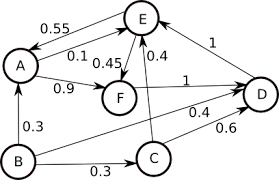

In [27]:
# The graph can be represented as follows:
G = np.array([[0,0,0,0,0.1,0.9],
              [0.3,0,0.3,0.4,0,0],
              [0,0,0,0.4,0.6,0],
              [0,0,0,0,1,0],
              [0.55,0,0,0,0,0.45],
              [0,0,0,1,0,0]
             ])
fiedler(G,6)

1.0 [3]
0.8500000000000001 [3, 0]
0.7999999999999999 [3, 0, 4]
1.3 [3, 0, 4, 5]
1.35 [3, 0, 4, 5, 2]


<ipython-input-26-fb7335ff75f5>:17: RuntimeWarning: invalid value encountered in double_scalars
  fun = lambda x: mpf(np.inner(x, L.dot(x))/(np.inner(x, D.dot(x))))


0.7999999999999999

TODO: Compare to the actual conductance

### Completing the Proof of Cheeger's Inequality

Finally, we complete the proof of Cheeger's inequality. Define a set $S \subseteq V$ to be *small* if $\text{vol}(S) \le \text{vol}(\overline{S})$ so that $\Psi(S) = w(\delta(S))/\text{vol}(S).$ We now claim that for nonegative $x$ and small $S:= \text{support}(x),$ we have
$$
\langle{x,Lx}\rangle \ge \frac{\Psi^2}{2}\langle{x,Dx}\rangle.
$$
Since Fiedler's algorithm first computes $\lambda_2,$ it cannot be guaranteed that $x$ is nonnegative or the corresponding support $S$ has to be small. In order to address the issue of nonnegativity, we split $x = x_{+} - x_{-}$ with $x_{+}, x_{-}$ both nonnegative. Then, we have 
$$
\langle{x,Lx}\rangle \ge \langle{x_{+}, Lx_{+}}\rangle + \langle{x_{-}, Lx_{-}}\rangle\text{ and } \langle{x,Dx}\rangle \le \langle{x_{+}, Dx_{+}}\rangle + \langle{x_{-}, Dx_{-}}\rangle.
$$
There is now a problem that $x_{+}$ and $x_{-}$ may not have negative support. To address this, we can translate $x$ before splitting since for all $\alpha \in \mathbb{R}, \langle{x,d}\rangle = 0,$ we have
$$
    \frac{\langle{x+\alpha\mathbb{1},Lx+\alpha\mathbb{1}}\rangle}{\langle{x+\alpha\mathbb{1}, Dx+\alpha\mathbb{1}}\rangle} \le \frac{\langle{x,Lx}\rangle}{\langle{x,Dx}\rangle}.
$$
Finally, we take $x \in \mathbb{R}^V$ with $\langle{x,d}\rangle = 0$ and $\langle{x,Lx}\rangle = \lambda_2\langle{x,Dx}\rangle,$ where due to the above inequalities, we have 
$$\langle{x,Lx}\rangle \ge \langle{x_{+}, Lx_{+}}\rangle + \langle{x_{-}, Lx_{-}}\rangle \ge \frac{\Psi^2}{2}\left({\langle{x,Dx}\rangle \le \langle{x_{+}, Dx_{+}}\rangle}\right) \ge \frac{\Psi^2}{2}\langle{x,Dx}\rangle. $$

Rearranging this proves the upper bound as desired.

Finally, we can make the proof algorithmic as follows. Let $\alpha$ denote the minimum conductance of all the cuts considered by the algorithm. Then, we can adjust the key inequality from above to incorporate $\alpha$ to get 
$$\langle{x,Lx}\rangle \ge \frac{\alpha^2}{2}\langle{x,Dx}\rangle.$$

Repeating the proof as before then yields the bound 
$\lambda_2 \ge \alpha^2/2,$ hence, $\alpha \le \sqrt{2\lambda_2}.$ 

### References
Quanrud, Kent. "CS588 Lecture notes." Fundamental Algorithms (2022).